In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
bulasik_miktar = ctrl.Antecedent(np.arange(0,101,1), "bulasik_miktar")
kirlilik_derecesi = ctrl.Antecedent(np.arange(0,101,1), "kirlilik_derecesi")
bulasik_cinsi = ctrl.Antecedent(np.arange(0,101,1), "bulasik_cinsi")

yikama_zamani = ctrl.Consequent(np.arange(30,161,1), "yikama_zamani")
deterjan_miktari = ctrl.Consequent(np.arange(0,100,0.5), "deterjan_miktari")
su_sicakligi = ctrl.Consequent(np.arange(35,71,0.5), "su_sicakligi")
ust_sepet_pompa_devri = ctrl.Consequent(np.arange(2100,3501,100), "ust_sepet_pompa_devri")
alt_sepet_pompa_devri = ctrl.Consequent(np.arange(2100,3501,100), "alt_sepet_pompa_devri")

In [ ]:
#Girdilerin durumu sebebiyle 3 yazıldı.
#Az kirli, Orta kirli, Çok kirli gibi değerler sebebiy.e
#auto member function - Oto Üyelik fonksiyonu
"""
bulasik_miktar.automf(3)
kirlilik_derecesi.automf(3)
bulasik_cinsi.automf(3)
"""


'\nbulasik_miktar.automf(3)\nkirlilik_derecesi.automf(3)\nbulasik_cinsi.automf(3)\n'

In [ ]:
bulasik_miktar["az"] = fuzz.trimf(bulasik_miktar.universe, [0,0,35])
bulasik_miktar["orta"] = fuzz.trimf(bulasik_miktar.universe, [15,50,85])
bulasik_miktar["çok"] = fuzz.trimf(bulasik_miktar.universe, [65,100,100])

kirlilik_derecesi["az kirli"] = fuzz.trimf(kirlilik_derecesi.universe, [0,0,35])
kirlilik_derecesi["orta kirli"] = fuzz.trimf(kirlilik_derecesi.universe, [15,50,85])
kirlilik_derecesi["çok kirli"] = fuzz.trimf(kirlilik_derecesi.universe, [65,100,100])

bulasik_cinsi["hassas"] = fuzz.trimf(kirlilik_derecesi.universe, [0,0,35])
bulasik_cinsi["karma"] = fuzz.trimf(kirlilik_derecesi.universe, [15,50,85])
bulasik_cinsi["güçlü"] = fuzz.trimf(kirlilik_derecesi.universe, [65,100,100])

In [ ]:
#Çıktıları tanımlayalım

yikama_zamani["çok kısa"] = fuzz.trimf(yikama_zamani.universe, [0,30,60])
yikama_zamani["kısa"] = fuzz.trimf(yikama_zamani.universe, [40,65,90])
yikama_zamani["orta"] = fuzz.trimf(yikama_zamani.universe, [70,95,120])
yikama_zamani["uzun"] = fuzz.trimf(yikama_zamani.universe, [100,125,150])
yikama_zamani["çok uzun"] = fuzz.trimf(yikama_zamani.universe, [130,160,160])

deterjan_miktari["çok az"] = fuzz.trimf(deterjan_miktari.universe, [0,0,0])
deterjan_miktari["az"] = fuzz.trimf(deterjan_miktari.universe, [17.5,30,42.5])
deterjan_miktari["normal"] = fuzz.trimf(deterjan_miktari.universe, [32.5,50,67.5])
deterjan_miktari["çok"] = fuzz.trimf(deterjan_miktari.universe, [57.5,75,92.5])
deterjan_miktari["çok fazla"] = fuzz.trimf(deterjan_miktari.universe, [82.5,100,100])

su_sicakligi["düşük"] = fuzz.trimf(su_sicakligi.universe, [0,35,50])
su_sicakligi["normal"] = fuzz.trimf(su_sicakligi.universe, [37.5,52.5,67.5])
su_sicakligi["yüksek"] = fuzz.trimf(su_sicakligi.universe, [55,70,70])

ust_sepet_pompa_devri["çok düşük"] = fuzz.trimf(ust_sepet_pompa_devri.universe, [0,2100,2400])
ust_sepet_pompa_devri["düşük"] = fuzz.trimf(ust_sepet_pompa_devri.universe, [2300,2500,2700])
ust_sepet_pompa_devri["orta"] = fuzz.trimf(ust_sepet_pompa_devri.universe, [2600,2800,3000])
ust_sepet_pompa_devri["yüksek"] = fuzz.trimf(ust_sepet_pompa_devri.universe, [2900,3100,3300])
ust_sepet_pompa_devri["çok yüksek"] = fuzz.trimf(ust_sepet_pompa_devri.universe, [3200,3500,3500])

alt_sepet_pompa_devri["çok düşük"] = fuzz.trimf(alt_sepet_pompa_devri.universe, [0,2100,2400])
alt_sepet_pompa_devri["düşük"] = fuzz.trimf(alt_sepet_pompa_devri.universe, [2300,2500,2700])
alt_sepet_pompa_devri["orta"] = fuzz.trimf(alt_sepet_pompa_devri.universe, [2600,2800,3000])
alt_sepet_pompa_devri["yüksek"] = fuzz.trimf(alt_sepet_pompa_devri.universe, [2900,3100,3300])
alt_sepet_pompa_devri["çok yüksek"] = fuzz.trimf(alt_sepet_pompa_devri.universe,[3200,3500,3500])


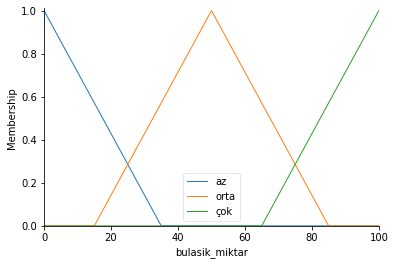

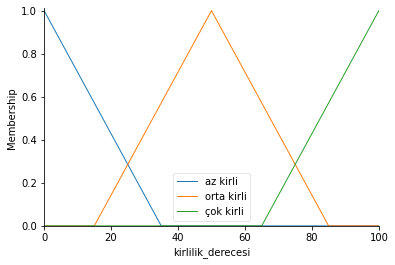

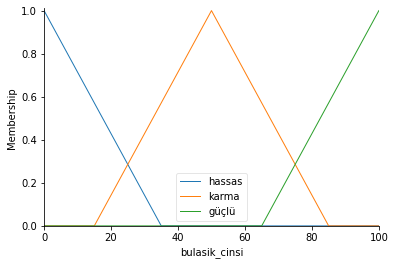

In [ ]:
bulasik_miktar.view()
kirlilik_derecesi.view()
bulasik_cinsi.view()

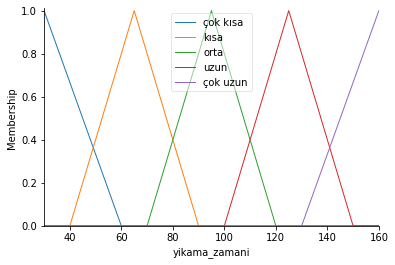

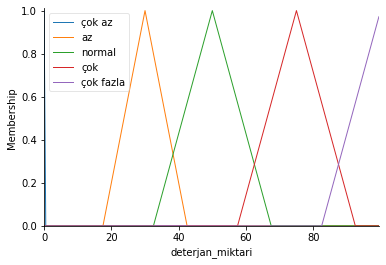

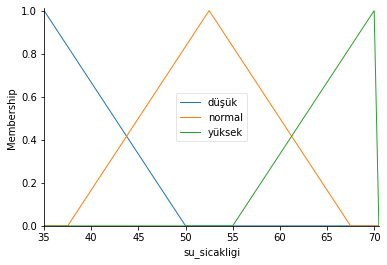

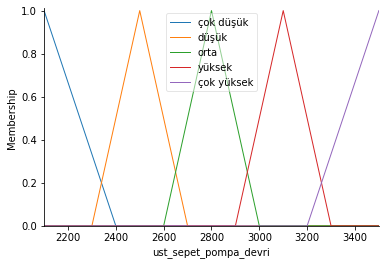

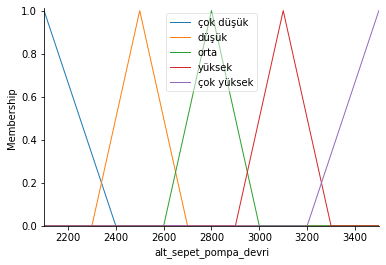

In [ ]:
yikama_zamani.view()
deterjan_miktari.view()
su_sicakligi.view()
ust_sepet_pompa_devri.view()
alt_sepet_pompa_devri.view()

Rule 1: Eğer bulaşık miktarı az ve kirlilik derecesi az kirli ve bulaşık cinsi hassas (kırılabilir) ise yıkama zamanı çok kısa ve deterjan miktarı çok az ve su sıcaklığı düşük ve üst pompa devri çok düşük ve alt pompa devri çok düşük.

In [ ]:
rule_a_1 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["az kirli"] & bulasik_cinsi["hassas"], yikama_zamani["çok kısa"])
rule_a_2 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["az kirli"] & bulasik_cinsi["hassas"], deterjan_miktari["çok az"])
rule_a_3 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["az kirli"] & bulasik_cinsi["hassas"], su_sicakligi["düşük"])
rule_a_4 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["az kirli"] & bulasik_cinsi["hassas"], ust_sepet_pompa_devri["çok düşük"])
rule_a_5 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["az kirli"] & bulasik_cinsi["hassas"], alt_sepet_pompa_devri["çok düşük"])


Rule 2:Eğer bulaşık miktarı az ve kirlilik derecesi çok kirli ve bulaşık cinsi karma ise yıkama zamanı orta ve deterjan miktarı normal ve su sıcaklığı yüksek ve üst pompa devri düşük ve alt pompa devri çok yüksek.

In [ ]:
rule_b_1 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["karma"], yikama_zamani["orta"])
rule_b_2 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["karma"], deterjan_miktari["normal"])
rule_b_3 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["karma"], su_sicakligi["yüksek"])
rule_b_4 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["karma"], ust_sepet_pompa_devri["düşük"])
rule_b_5 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["karma"], alt_sepet_pompa_devri["çok yüksek"])

Rule 3:Eğer bulaşık miktarı orta ve kirlilik derecesi orta kirli ve bulaşık cinsi güçlü (sağlam, dayanıklı) ise yıkama zamanı orta ve deterjan miktarı normal ve su sıcaklığı normal ve üst pompa devri yüksek ve alt pompa devri yüksek.

In [ ]:
rule_c_1 = ctrl.Rule(bulasik_miktar["orta"]  & kirlilik_derecesi["orta kirli"] & bulasik_cinsi["güçlü"], yikama_zamani["orta"])
rule_c_2 = ctrl.Rule(bulasik_miktar["orta"]  & kirlilik_derecesi["orta kirli"] & bulasik_cinsi["güçlü"], deterjan_miktari["normal"])
rule_c_3 = ctrl.Rule(bulasik_miktar["orta"]  & kirlilik_derecesi["orta kirli"] & bulasik_cinsi["güçlü"], su_sicakligi["normal"])
rule_c_4 = ctrl.Rule(bulasik_miktar["orta"]  & kirlilik_derecesi["orta kirli"] & bulasik_cinsi["güçlü"], ust_sepet_pompa_devri["yüksek"])
rule_c_5 = ctrl.Rule(bulasik_miktar["orta"]  & kirlilik_derecesi["orta kirli"] & bulasik_cinsi["güçlü"], alt_sepet_pompa_devri["yüksek"])

Rule 4:Eğer bulaşık miktarı çok ve kirlilik derecesi çok kirli ve bulaşık cinsi karma ise yıkama zamanı çok uzun ve deterjan miktarı çok fazla ve su sıcaklığı yüksek ve üst pompa devri düşük ve alt pompa devri çok yüksek.

In [ ]:
rule_d_1 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["karma"], yikama_zamani["çok uzun"])
rule_d_2 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["karma"], deterjan_miktari["çok fazla"])
rule_d_3 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["karma"], su_sicakligi["yüksek"])
rule_d_4 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["karma"], ust_sepet_pompa_devri["düşük"])
rule_d_5 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["karma"], alt_sepet_pompa_devri["çok yüksek"])

Rule 5:IF (miktar-cok & kirlilik-c & cins-guc) THEN zaman-cu, deterjan-cf, sıcaklık-y, ust-pompa-cy, alt-pompa-cy

In [ ]:
rule_e_1 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], yikama_zamani["çok uzun"])
rule_e_2 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], deterjan_miktari["çok fazla"])
rule_e_3 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], su_sicakligi["yüksek"])
rule_e_4 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], ust_sepet_pompa_devri["çok yüksek"])
rule_e_5 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], alt_sepet_pompa_devri["çok yüksek"])

Rule 6:IF (miktar-cok & kirlilik-c & cins-has) THEN zaman-cu, deterjan-cf, sıcaklık-y, ust-pompa-cd, alt-pompa-d

In [ ]:
rule_f_1 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["hassas"], yikama_zamani["çok uzun"])
rule_f_2 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["hassas"], deterjan_miktari["çok fazla"])
rule_f_3 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["hassas"], su_sicakligi["yüksek"])
rule_f_4 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["hassas"], ust_sepet_pompa_devri["çok düşük"])
rule_f_5 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["hassas"], alt_sepet_pompa_devri["düşük"])

Rule 7:IF (miktar-orta & kirlilik-a ) THEN zaman-k, deterjan-a, sıcaklık-d, ust-pompa-cd, alt-pompa-d

In [ ]:
rule_g_1 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["az kirli"] , yikama_zamani["kısa"])
rule_g_2 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["az kirli"] , deterjan_miktari["az"])
rule_g_3 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["az kirli"] , su_sicakligi["düşük"])
rule_g_4 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["az kirli"] , ust_sepet_pompa_devri["çok düşük"])
rule_g_5 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["az kirli"] , alt_sepet_pompa_devri["düşük"])

Rule 8:IF (miktar-orta & kirlilik-c & (cins-has | cins-kar)) THEN zaman-u, deterjan-f, sıcaklık-y, ust-pompa-d, alt-pompa-y     


In [ ]:
rule_h_1 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["çok kirli"] & (bulasik_cinsi["hassas"] | bulasik_cinsi["karma"]), yikama_zamani["uzun"])
rule_h_2 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["çok kirli"] & (bulasik_cinsi["hassas"] | bulasik_cinsi["karma"]), deterjan_miktari["çok fazla"])
rule_h_3 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["çok kirli"] & (bulasik_cinsi["hassas"] | bulasik_cinsi["karma"]), su_sicakligi["yüksek"])
rule_h_4 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["çok kirli"] & (bulasik_cinsi["hassas"] | bulasik_cinsi["karma"]), ust_sepet_pompa_devri["düşük"])
rule_h_5 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["çok kirli"] & (bulasik_cinsi["hassas"] | bulasik_cinsi["karma"]), alt_sepet_pompa_devri["yüksek"])

Rule 9:IF (miktar-orta & kirlilik-c & cins-guc) THEN zaman-u, deterjan-f, sıcaklık-y, ust-pompa-y, alt-pompa-cy     


In [ ]:
rule_i_1 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], yikama_zamani["uzun"])
rule_i_2 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], deterjan_miktari["çok fazla"])
rule_i_3 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], su_sicakligi["yüksek"])
rule_i_4 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], ust_sepet_pompa_devri["yüksek"])
rule_i_5 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], alt_sepet_pompa_devri["çok yüksek"])

Rule 10:IF (miktar-orta & kirlilik-o & (cins_has | cins-kar)) THEN zaman-o, deterjan-n, sıcaklık-n, ust-pompa-d, alt-pompa-o     


In [ ]:
rule_j_1 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["orta kirli"] & (bulasik_cinsi["hassas"] | bulasik_cinsi["karma"]), yikama_zamani["orta"])
rule_j_2 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["orta kirli"] & (bulasik_cinsi["hassas"] | bulasik_cinsi["karma"]), deterjan_miktari["normal"])
rule_j_3 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["orta kirli"] & (bulasik_cinsi["hassas"] | bulasik_cinsi["karma"]), su_sicakligi["normal"])
rule_j_4 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["orta kirli"] & (bulasik_cinsi["hassas"] | bulasik_cinsi["karma"]), ust_sepet_pompa_devri["düşük"])
rule_j_5 = ctrl.Rule(bulasik_miktar["orta"] & kirlilik_derecesi["orta kirli"] & (bulasik_cinsi["hassas"] | bulasik_cinsi["karma"]), alt_sepet_pompa_devri["orta"])

Rule 11:IF (miktar-cok & kirlilik-o ) THEN zaman-u, deterjan-cf, sıcaklık-n, ust-pompa-d, alt-pompa-o     

In [ ]:
rule_k_1 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["orta kirli"] , yikama_zamani["uzun"])
rule_k_2 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["orta kirli"] , deterjan_miktari["çok fazla"])
rule_k_3 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["orta kirli"] , su_sicakligi["normal"])
rule_k_4 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["orta kirli"] , ust_sepet_pompa_devri["düşük"])
rule_k_5 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["orta kirli"] , alt_sepet_pompa_devri["orta"])

Rule 12:IF (miktar-az & kirlilik-ak & (cins_kar | cins-guc)) THEN zaman-ck, deterjan-ca, sıcaklık-d, ust-pompa-d, alt-pompa-cd      


In [ ]:
rule_l_1 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["az kirli"] & (bulasik_cinsi["karma"] | bulasik_cinsi["güçlü"]), yikama_zamani["çok kısa"])
rule_l_2 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["az kirli"] & (bulasik_cinsi["karma"] | bulasik_cinsi["güçlü"]), deterjan_miktari["çok az"])
rule_l_3 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["az kirli"] & (bulasik_cinsi["karma"] | bulasik_cinsi["güçlü"]), su_sicakligi["düşük"])
rule_l_4 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["az kirli"] & (bulasik_cinsi["karma"] | bulasik_cinsi["güçlü"]), ust_sepet_pompa_devri["düşük"])
rule_l_5 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["az kirli"] & (bulasik_cinsi["karma"] | bulasik_cinsi["güçlü"]), alt_sepet_pompa_devri["çok düşük"])

Rule 13:IF (miktar-az & kirlilik-c & cins-has) THEN zaman-o, deterjan-n, sıcaklık-y, ust-pompa-d, alt-pompa-y     

In [ ]:
rule_m_1 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["hassas"], yikama_zamani["orta"])
rule_m_2 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["hassas"], deterjan_miktari["normal"])
rule_m_3 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["hassas"], su_sicakligi["yüksek"])
rule_m_4 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["hassas"], ust_sepet_pompa_devri["düşük"])
rule_m_5 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["hassas"], alt_sepet_pompa_devri["yüksek"])

Rule 14:IF (miktar-az & kirlilik-c & cins-guc) THEN zaman-o, deterjan-n, sıcaklık-y, ust-pompa-o, alt-pompa-cy     IF (miktar-az & kirlilik-o) THEN zaman-k, deterjan-az, sıcaklık-n, ust-pompa-d, alt-pompa-o

In [ ]:
rule_n_1 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], yikama_zamani["kısa"])
rule_n_2 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], deterjan_miktari["az"])
rule_n_3 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], su_sicakligi["normal"])
rule_n_4 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], ust_sepet_pompa_devri["düşük"])
rule_n_5 = ctrl.Rule(bulasik_miktar["az"] & kirlilik_derecesi["çok kirli"] & bulasik_cinsi["güçlü"], alt_sepet_pompa_devri["orta"])

Rule 15:IF (miktar-cok & kirlilik-a ) THEN zaman-o, deterjan-n, sıcaklık-d, ust-pompa-d, alt-pompa-cd      


In [ ]:
rule_o_1 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["az kirli"] , yikama_zamani["orta"])
rule_o_2 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["az kirli"] , deterjan_miktari["normal"])
rule_o_3 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["az kirli"] , su_sicakligi["düşük"])
rule_o_4 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["az kirli"] , ust_sepet_pompa_devri["düşük"])
rule_o_5 = ctrl.Rule(bulasik_miktar["çok"] & kirlilik_derecesi["azs kirli"] , alt_sepet_pompa_devri["çok düşük"])

ValueError: ignored

In [ ]:
kuralkontrol = ctrl.ControlSystem([rule_a_1, rule_a_2, rule_a_3, rule_a_4, rule_a_5,
                                   rule_b_1, rule_b_2, rule_b_3, rule_b_4, rule_b_5,
                                   rule_c_1, rule_c_2, rule_c_3, rule_c_4, rule_c_5,
                                   rule_d_1, rule_d_2, rule_d_3, rule_d_4, rule_d_5,
                                   rule_e_1, rule_e_2, rule_e_3, rule_e_4, rule_e_5,
                                   rule_f_1, rule_f_2, rule_f_3, rule_f_4, rule_f_5,
                                   rule_g_1, rule_g_2, rule_g_3, rule_g_4, rule_g_5,
                                   rule_h_1, rule_h_2, rule_h_3, rule_h_4, rule_h_5,
                                   rule_i_1, rule_i_2, rule_i_3, rule_i_4, rule_i_5,
                                   rule_j_1, rule_j_2, rule_j_3, rule_j_4, rule_j_5,
                                   rule_k_1, rule_k_2, rule_k_3, rule_k_4, rule_k_5,
                                   rule_l_1, rule_l_2, rule_l_3, rule_l_4, rule_l_5,
                                   rule_m_1, rule_m_2, rule_m_3, rule_m_4, rule_m_5,
                                   rule_n_1, rule_n_2, rule_n_3, rule_n_4, rule_n_5,
                                   rule_o_1, rule_o_2, rule_o_3, rule_o_4, rule_o_5])
kuralBelirleme = ctrl.ControlSystemSimulation(kuralkontrol)

NameError: ignored

In [ ]:
kuralBelirleme.input["bulasik_miktar"] = 62
kuralBelirleme.input["kirlilik_derecesi"] = 40.1
kuralBelirleme.input["bulasik_cinsi"] = 88.7

kuralBelirleme.compute()

print(kuralBelirleme.output["yikama_zamani"])
print(kuralBelirleme.output["deterjan_miktari"])
print(kuralBelirleme.output["su_sicakligi"])
print(kuralBelirleme.output["ust_sepet_pompa_devri"])
print(kuralBelirleme.output["alt_sepet_pompa_devri"])
alt_sepet_pompa_devri.view(kuralBelirleme)

In [ ]:
kuralBelirleme.input["bulasik_miktar"] = 90
kuralBelirleme.input["kirlilik_derecesi"] = 20.4
kuralBelirleme.input["bulasik_cinsi"] = 20.7

kuralBelirleme.compute()

print(kuralBelirleme.output["yikama_zamani"])
print(kuralBelirleme.output["deterjan_miktari"])
print(kuralBelirleme.output["su_sicakligi"])
print(kuralBelirleme.output["ust_sepet_pompa_devri"])
print(kuralBelirleme.output["alt_sepet_pompa_devri"])
alt_sepet_pompa_devri.view(kuralBelirleme)

ValueError: ignored

149.12462006079033
93.38518518518522
64.74356636271533
2500.0000000000005
3391.246200607902


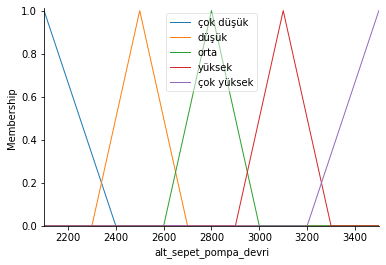

In [ ]:
kuralBelirleme.input["bulasik_miktar"] = 90
kuralBelirleme.input["kirlilik_derecesi"] = 98
kuralBelirleme.input["bulasik_cinsi"] = 62

kuralBelirleme.compute()

print(kuralBelirleme.output["yikama_zamani"])
print(kuralBelirleme.output["deterjan_miktari"])
print(kuralBelirleme.output["su_sicakligi"])
print(kuralBelirleme.output["ust_sepet_pompa_devri"])
print(kuralBelirleme.output["alt_sepet_pompa_devri"])
alt_sepet_pompa_devri.view(kuralBelirleme)

41.7466307277628
0.19577717879604672
40.873315363881396
2217.466307277628
2217.466307277628


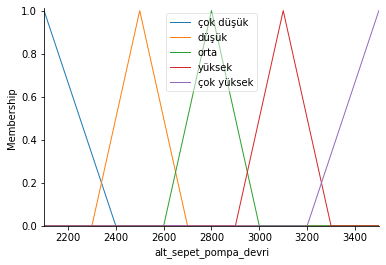

In [ ]:
kuralBelirleme.input["bulasik_miktar"] = 18
kuralBelirleme.input["kirlilik_derecesi"] = 15.1
kuralBelirleme.input["bulasik_cinsi"] = 12.7

kuralBelirleme.compute()

print(kuralBelirleme.output["yikama_zamani"])
print(kuralBelirleme.output["deterjan_miktari"])
print(kuralBelirleme.output["su_sicakligi"])
print(kuralBelirleme.output["ust_sepet_pompa_devri"])
print(kuralBelirleme.output["alt_sepet_pompa_devri"])
alt_sepet_pompa_devri.view(kuralBelirleme)

94.99999999999994
49.99999999999995
63.29370190181336
2499.9999999999995
3361.2490048651034


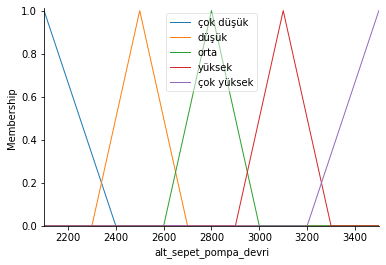

In [ ]:
kuralBelirleme.input["bulasik_miktar"] = 22
kuralBelirleme.input["kirlilik_derecesi"] = 70.4
kuralBelirleme.input["bulasik_cinsi"] = 50

kuralBelirleme.compute()

print(kuralBelirleme.output["yikama_zamani"])
print(kuralBelirleme.output["deterjan_miktari"])
print(kuralBelirleme.output["su_sicakligi"])
print(kuralBelirleme.output["ust_sepet_pompa_devri"])
print(kuralBelirleme.output["alt_sepet_pompa_devri"])
alt_sepet_pompa_devri.view(kuralBelirleme)